In [1]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from netCDF4 import Dataset

from IPython.display import display, Math, Latex, Image
from mpl_toolkits.basemap import Basemap
import mpl_toolkits

sys.path.append('/noc/users/am8e13/PyNGL-1.4.0/lib/python2.7/site-packages/PyNGL/')
import Ngl
sys.path.append('/noc/users/am8e13/Python/')
import komod
sys.path.append('/noc/users/am8e13/Python/PyNIO-1.4.0/')
import Nio

from python_functions import *
import cmocean
import random
import calendar

from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [43]:
path = '/scratch/general/am8e13/CORE_runs/ICTP/'
file2read = netcdf.NetCDFFile("/scratch/general/am8e13/CORE_runs/ICTP/19480101.ocean.nc",'r')
print file2read.variables

ValueError: new type not compatible with array.

In [54]:
grid36 = grid_read(36)
grid18 = grid_read(18)
grid9  = grid_read(9)

In [117]:
class inmon():
    def __init__(self):
        self.lat = []
        self.lon = []
        self.T = []
        self.S =[]
        self.depth = []
        self.title = 'INMON'
    def read(self):
        path = '/scratch/general/am8e13/CORE_runs/INMON/'
        file2read = netcdf.NetCDFFile(path+"Data01_TEM_60.nc",'r')
        tmp = file2read.variables['lat']
        lat = tmp[:]*1
        tmp = file2read.variables['lon']
        lon = tmp[:]*1         
        tmp = file2read.variables['lev']
        lev = tmp[:]*1   
        depth = tmp[:]*1        
        Z = tmp[:]*1          
        tmp = file2read.variables['tem']
        temp = tmp[:]*1 
        file2read = netcdf.NetCDFFile(path+"Data02_SAL_60.nc",'r')
        tmp = file2read.variables['sal']
        salt = tmp[:]*1
        file2read = netcdf.NetCDFFile(path+"Data03_DEN_60.nc",'r')
        tmp = file2read.variables['dens']
        den = tmp[:]*1
        
        T = np.nanmean(temp,axis=0)
        S = np.nanmean(salt,axis=0)
        rho = np.nanmean(den,axis=0)
        file2read.close()
        
        self.S = S
        self.lat = lat
        self.lon = lon

        T36 = np.zeros((T.shape[0],grid36['Depth'].shape[0],grid36['Depth'].shape[1]))
        T18 = np.zeros((T.shape[0],grid18['Depth'].shape[0],grid18['Depth'].shape[1]))
        T9 = np.zeros((T.shape[0],grid9['Depth'].shape[0],grid9['Depth'].shape[1]))
        
        S36 = np.zeros((T.shape[0],grid36['Depth'].shape[0],grid36['Depth'].shape[1]))
        S18 = np.zeros((T.shape[0],grid18['Depth'].shape[0],grid18['Depth'].shape[1]))
        S9 = np.zeros((T.shape[0],grid9['Depth'].shape[0],grid9['Depth'].shape[1]))
                      
        rho36 = np.zeros((T.shape[0],grid36['Depth'].shape[0],grid36['Depth'].shape[1]))
        rho18 = np.zeros((T.shape[0],grid18['Depth'].shape[0],grid18['Depth'].shape[1]))
        rho9 = np.zeros((T.shape[0],grid9['Depth'].shape[0],grid9['Depth'].shape[1]))
                        
        for k in range(0,T.shape[0]):
            T36[k,:,:] = mpl_toolkits.basemap.interp(T[k,:,:], lon, \
                                lat,grid36['XC'],grid36['YC'],checkbounds=False, masked=False, order=1)
            S36[k,:,:] = mpl_toolkits.basemap.interp(S[k,:,:], lon, \
                                lat,grid36['XC'],grid36['YC'],checkbounds=False, masked=False, order=1)
            rho36[k,:,:] = mpl_toolkits.basemap.interp(rho[k,:,:], lon, \
                                lat,grid36['XC'],grid36['YC'],checkbounds=False, masked=False, order=1)
                        
            T18[k,:,:] = mpl_toolkits.basemap.interp(T[k,:,:], lon, \
                                lat,grid18['XC'],grid18['YC'],checkbounds=False, masked=False, order=1)
            S18[k,:,:] = mpl_toolkits.basemap.interp(S[k,:,:], lon, \
                                lat,grid18['XC'],grid18['YC'],checkbounds=False, masked=False, order=1)
            rho18[k,:,:] = mpl_toolkits.basemap.interp(rho[k,:,:], lon, \
                                lat,grid18['XC'],grid18['YC'],checkbounds=False, masked=False, order=1)
                
            T9[k,:,:] = mpl_toolkits.basemap.interp(T[k,:,:], lon, \
                                lat,grid9['XC'],grid9['YC'],checkbounds=False, masked=False, order=1)
            S9[k,:,:] = mpl_toolkits.basemap.interp(S[k,:,:], lon, \
                                lat,grid9['XC'],grid9['YC'],checkbounds=False, masked=False, order=1)
            rho9[k,:,:] = mpl_toolkits.basemap.interp(rho[k,:,:], lon, \
                                lat,grid9['XC'],grid9['YC'],checkbounds=False, masked=False, order=1)

        self.T36 = T36
        self.T18 = T18
        self.T9 = T9
        self.S36 = S36
        self.S18 = S18
        self.S9 = S9
        self.rho36 = rho36
        self.rho18 = rho18
        self.rho9 = rho9

In [118]:
INMON = inmon()
INMON.read()

<matplotlib.colorbar.Colorbar instance at 0x2b424ed32b00>

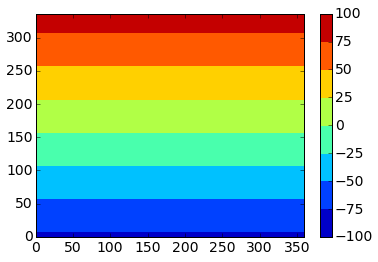

In [111]:
a = np.meshgrid(INMON.lon,INMON.lat)

In [141]:
INMON.S36

array([[[ -9.99000000e+08,  -9.99000000e+08,  -9.99000000e+08, ...,
           3.23144631e+01,   3.23260884e+01,   3.23494586e+01],
        [ -9.99000000e+08,  -9.99000000e+08,  -9.99000000e+08, ...,
           3.23769374e+01,   3.23846228e+01,   3.24110049e+01],
        [ -9.99000000e+08,  -9.99000000e+08,  -9.99000000e+08, ...,
           3.24326187e+01,   3.24452276e+01,   3.24883286e+01],
        ..., 
        [ -9.99000000e+08,  -9.99000000e+08,  -9.99000000e+08, ...,
          -9.99000000e+08,  -9.99000000e+08,  -9.99000000e+08],
        [ -9.99000000e+08,  -9.99000000e+08,  -9.99000000e+08, ...,
          -9.99000000e+08,  -9.99000000e+08,  -9.99000000e+08],
        [ -9.99000000e+08,  -9.99000000e+08,  -9.99000000e+08, ...,
          -9.99000000e+08,  -9.99000000e+08,  -9.99000000e+08]],

       [[ -9.99000000e+08,  -9.99000000e+08,  -9.99000000e+08, ...,
           3.23422418e+01,   3.23532576e+01,   3.23734359e+01],
        [ -9.99000000e+08,  -9.99000000e+08,  -9.99000000e+0

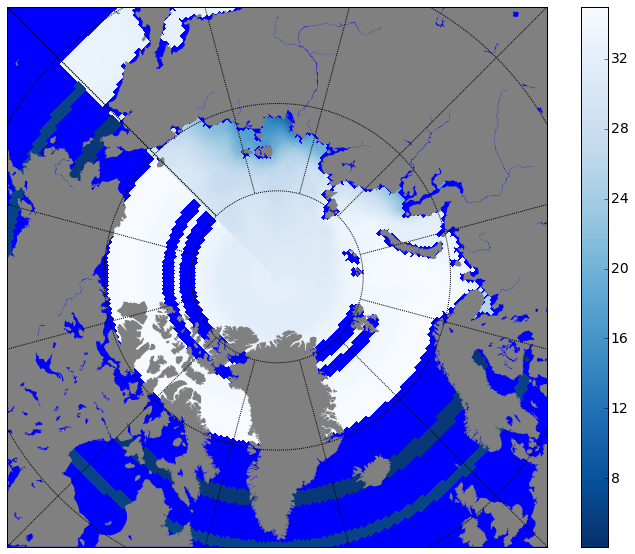

In [143]:
lat_ts=90.0
lat_0=90.0
lon_0=-45.0
sgn=1
width=7000000.
height=7000000.0
fig,ax = plt.subplots(1,1)
m = Basemap(ax=ax,width=width,height=height,resolution='l',\
        projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)
# the continents will be drawn on top.
m.drawmapboundary(fill_color='blue')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='grey',lake_color='blue')
#grid1 = np.meshgrid(INMON.lon,INMON.lat)
x,y = m(grid36['XC'],grid36['YC'])
datam = INMON.S36[0,:,:]
sitm = np.ma.masked_where(datam<-100,datam)
CS=m.pcolormesh(x,y,sitm,cmap=matplotlib.cm.Blues_r)
m.drawparallels(np.arange(-80.,81.,15.))
m.drawmeridians(np.arange(-180.,181.,30.))
plt.colorbar(CS)
#axes.flat[ind].set_title(data_comp[data].title,fontsize=16)
fig.subplots_adjust(right=1.7,top=2.)
    #fig.savefig('/noc/users/am8e13/Figures/basemap_seaice',dpi=dpires, bbox_inches='tight')

In [80]:
class ncar():
    def __init__(self):
        self.lat = []
        self.lon = []
        self.T = []
        self.S =[]
        self.depth = []
        self.title = 'INMON'
    def read(self):
        path = '/scratch/general/am8e13/CORE_runs/NCAR/'
        file2read = netcdf.NetCDFFile(path+"g40.000.pop.h.0300-12.nc",'r')
        tmp = file2read.variables['ULONG']
        lat = tmp[:]*1
        tmp = file2read.variables['ULAT']
        lon = tmp[:]*1         
        tmp = file2read.variables['z_t']
        lev = tmp[:]*1   
        depth = tmp[:]*1        
        Z = tmp[:]*1          
        tmp = file2read.variables['TEMP']
        temp = tmp[:]*1 
        tmp = file2read.variables['SALT']
        salt = tmp[:]*1
        tmp = file2read.variables['RHO']
        den = tmp[:]*1
        
        T = np.nanmean(temp,axis=0)
        S = np.nanmean(salt,axis=0)
        rho = np.nanmean(den,axis=0)
        file2read.close()

        T36 = np.zeros((T.shape[0],grid36['Depth'].shape[0],grid36['Depth'].shape[1]))
        T18 = np.zeros((T.shape[0],grid18['Depth'].shape[0],grid18['Depth'].shape[1]))
        T9 = np.zeros((T.shape[0],grid9['Depth'].shape[0],grid9['Depth'].shape[1]))
        
        S36 = np.zeros((T.shape[0],grid36['Depth'].shape[0],grid36['Depth'].shape[1]))
        S18 = np.zeros((T.shape[0],grid18['Depth'].shape[0],grid18['Depth'].shape[1]))
        S9 = np.zeros((T.shape[0],grid9['Depth'].shape[0],grid9['Depth'].shape[1]))
                      
        rho36 = np.zeros((T.shape[0],grid36['Depth'].shape[0],grid36['Depth'].shape[1]))
        rho18 = np.zeros((T.shape[0],grid18['Depth'].shape[0],grid18['Depth'].shape[1]))
        rho9 = np.zeros((T.shape[0],grid9['Depth'].shape[0],grid9['Depth'].shape[1]))
        
        self.T = T
        self.lon = lon
        self.lat = lat
        print T.shape, lat.shape, lon.shape
                        
        for k in range(0,T.shape[0]):
            T36[k,:,:] = mpl_toolkits.basemap.interp(T[k,:,:], lon, \
                                lat,grid36['XC'],grid36['YC'],checkbounds=False, masked=False, order=1)
            S36[k,:,:] = mpl_toolkits.basemap.interp(S[k,:,:], lon, \
                                lat,grid36['XC'],grid36['YC'],checkbounds=False, masked=False, order=1)
            rho36[k,:,:] = mpl_toolkits.basemap.interp(rho[k,:,:], lon, \
                                lat,grid36['XC'],grid36['YC'],checkbounds=False, masked=False, order=1)
                        
            T18[k,:,:] = mpl_toolkits.basemap.interp(T[k,:,:], lon, \
                                lat,grid18['XC'],grid18['YC'],checkbounds=False, masked=False, order=1)
            S18[k,:,:] = mpl_toolkits.basemap.interp(S[k,:,:], lon, \
                                lat,grid18['XC'],grid18['YC'],checkbounds=False, masked=False, order=1)
            rho18[k,:,:] = mpl_toolkits.basemap.interp(rho[k,:,:], lon, \
                                lat,grid18['XC'],grid18['YC'],checkbounds=False, masked=False, order=1)
                
            T9[k,:,:] = mpl_toolkits.basemap.interp(T[k,:,:], lon, \
                                lat,grid9['XC'],grid9['YC'],checkbounds=False, masked=False, order=1)
            S9[k,:,:] = mpl_toolkits.basemap.interp(S[k,:,:], lon, \
                                lat,grid9['XC'],grid9['YC'],checkbounds=False, masked=False, order=1)
            rho9[k,:,:] = mpl_toolkits.basemap.interp(rho[k,:,:], lon, \
                                lat,grid9['XC'],grid9['YC'],checkbounds=False, masked=False, order=1)

        self.T36 = T36
        self.T18 = T18
        self.T9 = T9
        self.S36 = S36
        self.S18 = S18
        self.S9 = S9
        self.rho36 = rho36
        self.rho18 = rho18
        self.rho9 = rho9

In [81]:
NCAR = ncar()
NCAR.read()

(60, 384, 320) (384, 320) (384, 320)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<matplotlib.contour.QuadContourSet instance at 0x2b436521fe60>

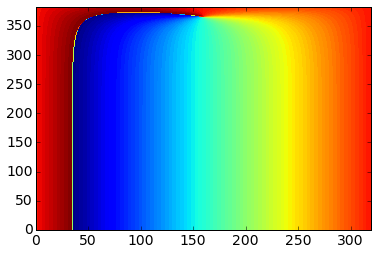

In [86]:
plt.contourf(NCAR.lat,100)

In [88]:
class nemo_orca():
    def __init__(self):
        self.lat = []
        self.lon = []
        self.T = []
        self.S =[]
        self.depth = []
        self.title = 'INMON'
    def read(self):
        path = '/scratch/general/am8e13/CORE_runs/NEMO_orca/'
        file2read = netcdf.NetCDFFile(path+"ORCA1-N403_1948to2007m03_vosaline.nc",'r')
        tmp = file2read.variables['nav_lon']
        lat = tmp[:]*1
        tmp = file2read.variables['nav_lat']
        lon = tmp[:]*1         
        tmp = file2read.variables['deptht']
        lev = tmp[:]*1   
        depth = tmp[:]*1        
        Z = tmp[:]*1          
        tmp = file2read.variables['vosaline']
        temp = tmp[:]*1 
        #file2read = netcdf.NetCDFFile(path+"ORCA1-N403_1948to2007m03_vosaline.nc")
        #tmp = file2read.variables['TEMP']        
        salt = tmp[:]*1
        #tmp = file2read.variables['RHO']
        den = tmp[:]*1
        
        
        T = np.nanmean(temp,axis=0)
        S = np.nanmean(salt,axis=0)
        rho = np.nanmean(den,axis=0)
        file2read.close()

        T36 = np.zeros((T.shape[0],grid36['Depth'].shape[0],grid36['Depth'].shape[1]))
        T18 = np.zeros((T.shape[0],grid18['Depth'].shape[0],grid18['Depth'].shape[1]))
        T9 = np.zeros((T.shape[0],grid9['Depth'].shape[0],grid9['Depth'].shape[1]))
        
        S36 = np.zeros((T.shape[0],grid36['Depth'].shape[0],grid36['Depth'].shape[1]))
        S18 = np.zeros((T.shape[0],grid18['Depth'].shape[0],grid18['Depth'].shape[1]))
        S9 = np.zeros((T.shape[0],grid9['Depth'].shape[0],grid9['Depth'].shape[1]))
                      
        rho36 = np.zeros((T.shape[0],grid36['Depth'].shape[0],grid36['Depth'].shape[1]))
        rho18 = np.zeros((T.shape[0],grid18['Depth'].shape[0],grid18['Depth'].shape[1]))
        rho9 = np.zeros((T.shape[0],grid9['Depth'].shape[0],grid9['Depth'].shape[1]))
        
        self.T = T
        
        print T.shape
                        
        for k in range(0,T.shape[0]):
            T36[k,:,:] = mpl_toolkits.basemap.interp(T[k,:,:], lon, \
                                lat,grid36['XC'],grid36['YC'],checkbounds=False, masked=False, order=1)
            S36[k,:,:] = mpl_toolkits.basemap.interp(S[k,:,:], lon, \
                                lat,grid36['XC'],grid36['YC'],checkbounds=False, masked=False, order=1)
            rho36[k,:,:] = mpl_toolkits.basemap.interp(rho[k,:,:], lon, \
                                lat,grid36['XC'],grid36['YC'],checkbounds=False, masked=False, order=1)
                        
            T18[k,:,:] = mpl_toolkits.basemap.interp(T[k,:,:], lon, \
                                lat,grid18['XC'],grid18['YC'],checkbounds=False, masked=False, order=1)
            S18[k,:,:] = mpl_toolkits.basemap.interp(S[k,:,:], lon, \
                                lat,grid18['XC'],grid18['YC'],checkbounds=False, masked=False, order=1)
            rho18[k,:,:] = mpl_toolkits.basemap.interp(rho[k,:,:], lon, \
                                lat,grid18['XC'],grid18['YC'],checkbounds=False, masked=False, order=1)
                
            T9[k,:,:] = mpl_toolkits.basemap.interp(T[k,:,:], lon, \
                                lat,grid9['XC'],grid9['YC'],checkbounds=False, masked=False, order=1)
            S9[k,:,:] = mpl_toolkits.basemap.interp(S[k,:,:], lon, \
                                lat,grid9['XC'],grid9['YC'],checkbounds=False, masked=False, order=1)
            rho9[k,:,:] = mpl_toolkits.basemap.interp(rho[k,:,:], lon, \
                                lat,grid9['XC'],grid9['YC'],checkbounds=False, masked=False, order=1)

        self.T36 = T36
        self.T18 = T18
        self.T9 = T9
        self.S36 = S36
        self.S18 = S18
        self.S9 = S9
        self.rho36 = rho36
        self.rho18 = rho18
        self.rho9 = rho9

In [89]:
orca = nemo_orca()
orca.read()

TypeError: Error: /scratch/general/am8e13/CORE_runs/NEMO_orca/ORCA1-N403_1948to2007m03_vosaline.nc is not a valid NetCDF 3 file